In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Zomato data .csv')

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df['rate'].str.split('/').str.get(0)

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: object

In [8]:
df['rate'] = df['rate'].str.split('/').str.get(0)

In [10]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [11]:
df['rate'] = df['rate'].astype(float)

In [12]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [13]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [44]:
df = df.rename(columns = {'listed_in(type)' : 'restaurant_type'})

In [45]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),restaurant_type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='restaurant_type', ylabel='count'>

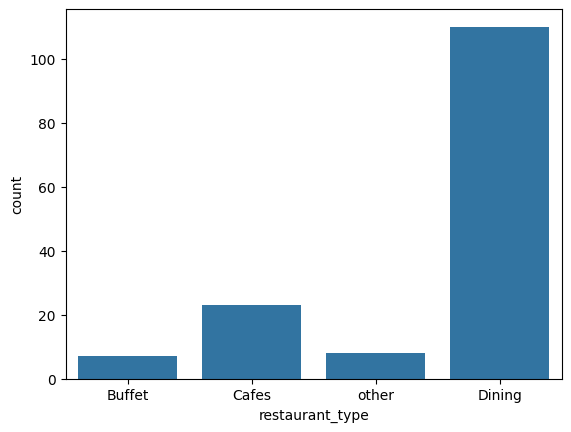

In [47]:
sns.countplot(x = df['restaurant_type'])

In [51]:
grouped_data = df.groupby(['restaurant_type'])['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

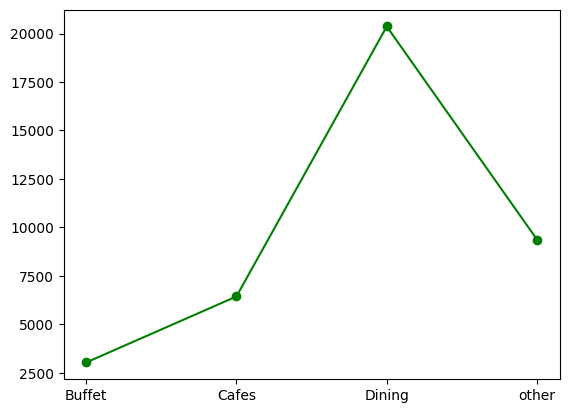

In [67]:
plt.plot(result, c="green", marker="o")

Вывод: большинство людей предпочитает обедать в ресторанах

In [73]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
 
print("Ресторан с наибольшим количеством голосов:")
print(restaurant_with_max_votes)

Ресторан с наибольшим количеством голосов:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

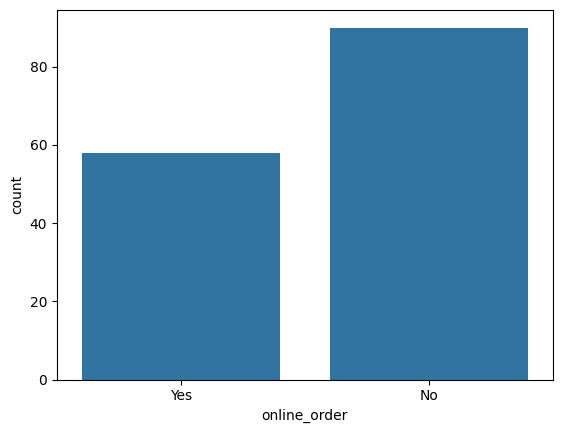

In [74]:
sns.countplot(x = df['online_order'])

Вывод: большинство ресторанов не принимает онлайн заказы

Text(0.5, 1.0, 'Распределение оценок')

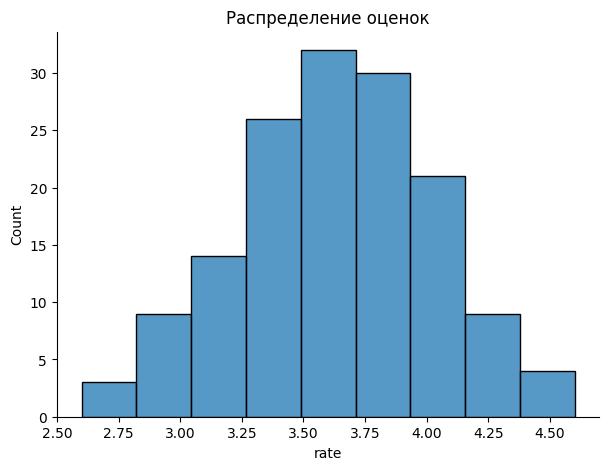

In [85]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(df['rate'])
plt.title('Распределение оценок')

Видно, что средняя оценка у ресторанов колеблется от 3.5 до 3.75

In [89]:
df['rate'].mean()

3.6331081081081082

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

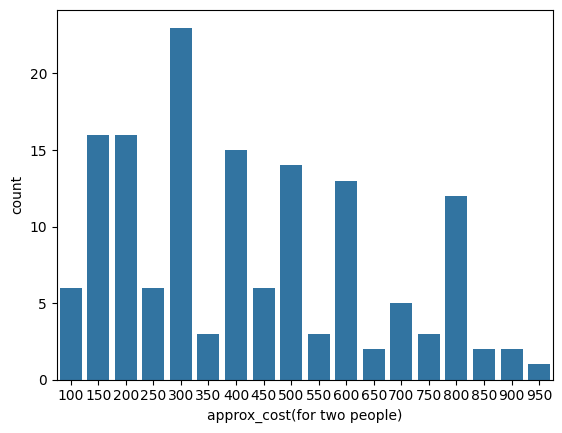

In [90]:
sns.countplot(x = df['approx_cost(for two people)'])

C:\Users\Vano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='online_order', ylabel='rate'>

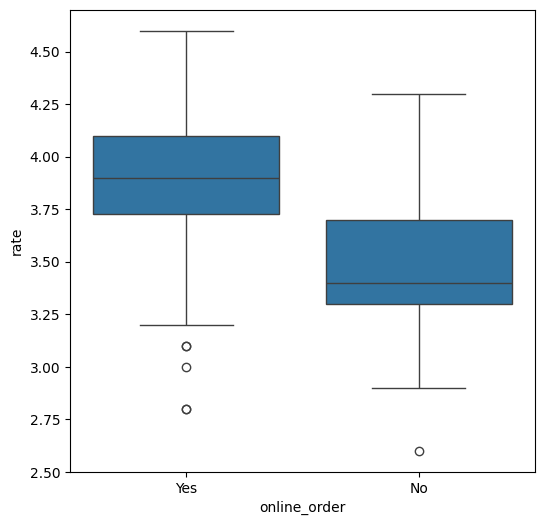

In [91]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

Онлайн заказы получают оценки выше чем оффлайн заказы

Text(0.5, 1.0, 'Heatmap')

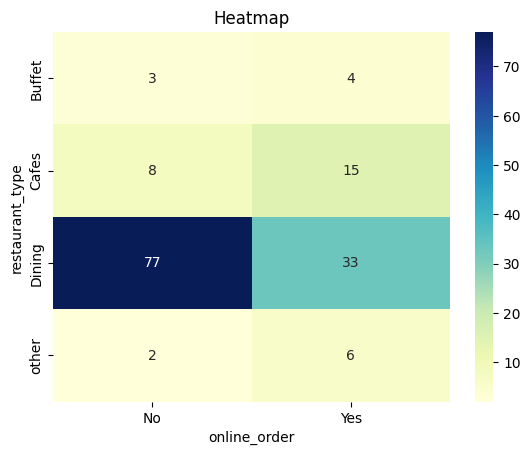

In [94]:
pivot_table = df.pivot_table(index='restaurant_type', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")

Люди предпочитают делать заказы в столовых лично, а вот в кафе, наоборот, предпочитают делать онлайн заказы

<Axes: xlabel='approx_cost(for two people)', ylabel='rate'>

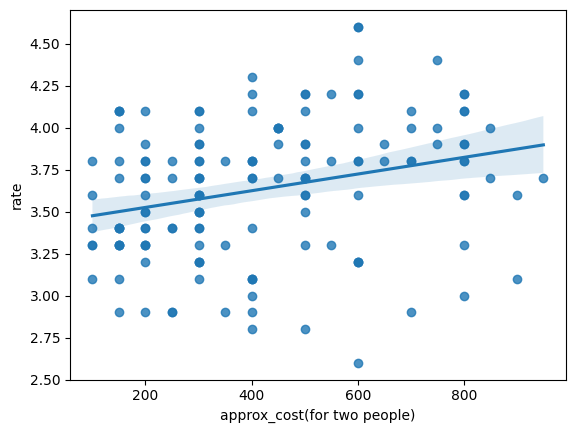

In [103]:
sns.regplot(x = 'approx_cost(for two people)', y = 'rate',  data = df)

С повышением цены возрастает средняя оценка, почти пропадают низкие оценки